In [1]:
#import libraries
import tmdbsimple as tmdb
from imdb import IMDb

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
tmdb.API_KEY = '15f7188d2ca006ec3cf1954314c298cd' ##'822771ddecfdc59a99893ffeaa1ec9b4'##'455e4535405115285f107dc76734be7e'

In [3]:
url = "https://raw.githubusercontent.com/paulharris171/cs109b-Movie-Prediction-/master/complete_movie_dataframe.csv?token=AKVfPc31wDvfvf_CzkRq25UJHGPZBNAvks5ZEoaWwA%3D%3D"
data = pd.read_csv(url)

In [4]:
data.head()

,director_name,budget,genres,actor_1_name,movie_title,plot_keywords,content_rating,genre_adjusted,all_keywords
0,James Cameron,237000000,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",CCH Pounder,Avatar,"['James Cameron', 'CCH Pounder', 'avatar', 'fu...",PG-13,Sci-Fi,"['James Cameron', 'CCH Pounder', 'avatar', 'fu..."
1,Gore Verbinski,300000000,"['Action', 'Adventure', 'Fantasy']",Johnny Depp,Pirates of the Caribbean: At World's End,"['Gore Verbinski', 'Johnny Depp', 'goddess', '...",PG-13,Action-Comedy,"['Gore Verbinski', 'Johnny Depp', 'goddess', '..."
2,Sam Mendes,245000000,"['Action', 'Adventure', 'Thriller']",Christoph Waltz,Spectre,"['Sam Mendes', 'Christoph Waltz', 'bomb', 'esp...",PG-13,Action-Comedy,"['Sam Mendes', 'Christoph Waltz', 'bomb', 'esp..."
3,Christopher Nolan,250000000,"['Action', 'Thriller']",Tom Hardy,The Dark Knight Rises,"['Christopher Nolan', 'Tom Hardy', 'deception'...",PG-13,Action-Comedy,"['Christopher Nolan', 'Tom Hardy', 'deception'..."
4,Andrew Stanton,263700000,"['Action', 'Adventure', 'Sci-Fi']",Daryl Sabara,John Carter,"['Andrew Stanton', 'Daryl Sabara', 'alien', 'a...",PG-13,Sci-Fi,"['Andrew Stanton', 'Daryl Sabara', 'alien', 'a..."


## Messing Around

In [5]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='The Matrix')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg'

In [6]:
this = np.array([[1,1],[1,2]])

In [7]:
search = tmdb.Search()
response = search.movie(query='The Matrix')
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster
import urllib
from PIL import Image
urllib.urlretrieve(matrix_poster, "local-filename.jpg")
one = Image.open('local-filename.jpg')

The link for the movie poster is found below:


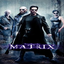

In [8]:
one2 = one.resize((64, 64), Image.ANTIALIAS)
one2

In [9]:
um = np.array(one2)

In [10]:
this = np.expand_dims(um, axis = 0)
this.shape

(1, 64, 64, 3)

In [11]:
yus = np.stack((um,um))

In [12]:
yus.shape

(2, 64, 64, 3)

In [13]:
ruh = np.concatenate((yus,yus))

In [14]:
ruh.shape

(4, 64, 64, 3)

In [15]:
np.concatenate((yus,ruh)).shape

(6, 64, 64, 3)

In [16]:
data["movie_title"][1][:-2]

"Pirates of the Caribbean: At World's End"

## Implementation

In [17]:
print set(data["genre_adjusted"])
len(set(data["genre_adjusted"]))

set(['Sci-Fi', 'Crime', 'Romance', 'Animation', 'Music', 'Comedy', 'War', 'Horror', 'Adventure', 'Action-Comedy', 'Western', 'Thriller', 'Game-Show', 'Mystery', 'Drama', 'Action', 'Documentary', 'Musical', 'History', 'Family', 'Fantasy', 'Rom-Com', 'Sport', 'Biography'])


24

In [18]:
import time
#base url
base_url = "http://image.tmdb.org/t/p/w185"
search = tmdb.Search()
images = 0
genres = []
count = 1
k = 25
switch = False
#Create for loop that cycles through dataframe.movie_title
for i in range(len(data["movie_title"])):
    ####
    #Search for movie.
    movie_title = data["movie_title"][i][:-2]
    response = search.movie(query=movie_title)
    #Create movie poster url.
    print(movie_title)
    if (response['total_results'] != 0):
        if (response['results'][0]['poster_path'] is not None):
            if(data["genre_adjusted"][i] != 'Music'):
                if(data["genre_adjusted"][i] != 'Game-Show'):
                    if (data["genre_adjusted"][i] != 'Romance'):
                            #print len(response['results'][0]['poster_path'])
                        poster_url = base_url + response['results'][0]['poster_path']
                        #Retrieve jpg version from url.
                        urllib.urlretrieve(poster_url, "local-file.jpg")
                        img = Image.open('local-file.jpg')
                        #RGBA check.
                        img = img.convert('RGB')
                        #Resize.
                        img = img.resize((64, 64), Image.ANTIALIAS)
                        img = np.array(img)
                        img = np.expand_dims(img, axis = 0)
                        #Add image to numpy array stack
                        if(i == 0):
                            images = img
                        else:
                            #print images.shape
                            #print img.shape
                            images = np.concatenate((images, img))

                        ## add to genres
                        genres = np.append(genres, data["genre_adjusted"][i])


    if(count == k):
        k += 25
        time.sleep(10)
        if switch:
            print(count)
            switch = False
        else:
            switch = True
    count += 1
    

Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
Skyfall
Spider-Man 2
Iron Man 3
Alice in Wonderland
X-Men: The Last Stand
Monsters University
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
Oz the Great and Powerful
The Amazing Spider-Man 2
TRON: Legacy
Cars 2
Green Lantern
Toy Story 3
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek Into Darkness
Jack the Giant S

### Testing Out

In [19]:
#print img
#Resize.
img = Image.open('local-file.jpg')
img = img.convert('RGB')
img = img.resize((100, 100), Image.ANTIALIAS)
img = np.array(img)
img = np.expand_dims(img, axis = 0)
img.shape

(1, 100, 100, 3)

In [20]:
img.shape[3] == 3

True

In [21]:
genres

array(['Sci-Fi', 'Action-Comedy', 'Action-Comedy', ..., 'Rom-Com',
       'Mystery', 'Documentary'], 
      dtype='|S32')

In [7]:
images = np.load(open('images_numpy.npy'))

In [8]:
genres = np.load(open('genres_numpy.npy'))

# Keras - Scratch

In [9]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [10]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

from keras.optimizers import SGD

from keras import backend as K

Using TensorFlow backend.


In [11]:
def shuffle_in_unison(a,b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison(images, genres)

In [12]:
n = len(images)
split = int(n * .5)
x_train = images[:split,]
x_test = images[split:,]
y_train = genres[:split]
y_test = genres[split:]

In [13]:
# input image dimensions
img_rows, img_cols = 64, 64

# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 25
# this is fixed, we have 13 digits in our data set
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
num_classes = 12
# number of iterations over the complete training data
epochs = 50

## X_train is of shape n_samples x 64 x 64
## for a CNN we want to keep the image shape
## need to explicitly tell keras that it is a gray value image
## so each image is 28x28x1 not 28x28x3
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# normalize image values to [0,1]
# interestingly the keras example code does not center the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2415, 64, 64, 3)
2415 train samples
2415 test samples


In [14]:
# convert class vectors to binary class matrices
# keras likes one hot encoding instead of class names
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [15]:
y_train.shape

(2415, 21)

In [16]:
# create an empty network model
image_processor = Sequential()

# --- input layer ---
image_processor.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# --- max pool ---
image_processor.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
# we could double the number of filters as max pool made the 
# feature maps much smaller 
# just not doing this to improve runtime
image_processor.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# --- max pool ---
image_processor.add(MaxPooling2D(pool_size=(2, 2)))
# flatten for fully connected classification layer
image_processor.add(Flatten())
# note that the 13 is the number of classes we have
# the classes are mutually exclusive so softmax is a good choice
# --- fully connected layer ---
image_processor.add(Dense(64, activation='relu'))
# --- classification ---
image_processor.add(Dense(21, activation='softmax'))

# prints out a summary of the model architecture
image_processor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                401472    
_________________________________________________________________
dense_2 (Dense)              (None, 21)                1365      
Total para

In [17]:
# this does all necessary compiling. In tensorflow this is much quicker than in theano
# the setup is our basic categorical crossentropy with stochastic gradient decent
# we also specify that we want to evaluate our model in terms of accuracy
sgd = SGD(lr=0.1, momentum=0.9)
image_processor.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [18]:
# this is now the actual training
# in addition to the training data we provide validation data
# this data is used to calculate the performance of the model over all the epochs
# this is useful to determine when training should stop
# in our case we just use it to monitor the evolution of the model over the training epochs
# if we use the validation data to determine when to stop the training or which model to save, we 
# should not use the test data, but a separate validation set. 
history = image_processor.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# once training is complete, let's see how well we have done
score = image_processor.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2415 samples, validate on 2415 samples
Epoch 1/50
2415/2415 [==============================] - 1s - loss: 2.7508 - acc: 0.1602 - val_loss: 2.6983 - val_acc: 0.1776

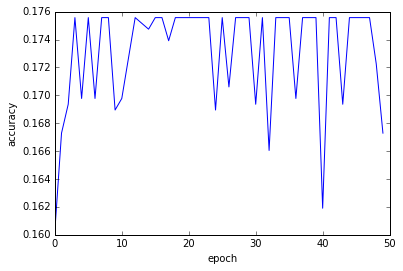

In [19]:
# here is a visualization of the training process
# typically we gain a lot in the beginning and then
# training slows down
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [20]:
# Look at the weights of the first layer
layer = image_processor.layers[0]
# this actually returns a list 
# first element is W
# second element are all the biases b
weights = layer.get_weights()
# the weights are the number of pixels times the number of filters (hidden units)
print("Shape of W")
print(weights[0].shape)

Shape of W
(3, 3, 3, 16)


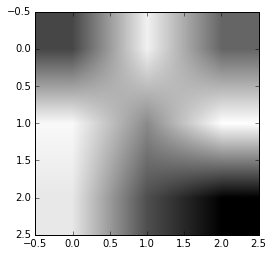

In [21]:
# look at just the first filter
w = weights[0][:,:,0,0]
w = w.reshape((3,3))
plt.imshow(w, cmap='gray')

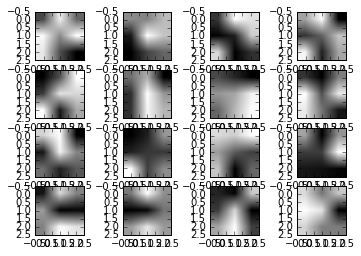

In [22]:
# make a figure for the first 25 filters
index = 0
for i in range(4):
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(3,3)
        index+=1
        plt.subplot(4,4,index)
        plt.imshow(w, cmap='gray')    

plt.show()

# Keras - PreTrain

In [23]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications


In [24]:
import h5py as h5py

In [32]:
from keras.models import Model

In [73]:
# dimensions of our images.
img_width, img_height = 64, 64

In [74]:
#Values for data
train_data_dir = x_train
validation_data_dir = x_test
nb_train_samples = 2415
nb_validation_samples = 2415
epochs = 10
batch_size = 45

In [75]:
#Base Model taken from Pretrained internet dataset imagenet
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [76]:
#Create top layer for the model which will be placed over the rest of the layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(21, activation='sigmoid'))

In [77]:
#Initiate the model with top layer
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [78]:
#compile data
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

In [79]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [80]:
# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [81]:
# this is a generator that will read pictures found in
# train data, and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow(train_data_dir, y_train)

In [82]:
#Runs the same thing above except for validation data
validation_generator = test_datagen.flow(validation_data_dir, y_test)

In [83]:
##Trying Fine tuning
# set the first 19 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:20]:
    layer.trainable = False

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [85]:
#Generate/running the model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2, workers=12)

Epoch 1/10
14s - loss: 5.0472 - acc: 0.0761 - val_loss: 5.9575 - val_acc: 0.0784
Epoch 2/10
14s - loss: 5.8733 - acc: 0.0791 - val_loss: 5.9358 - val_acc: 0.0715
Epoch 3/10
14s - loss: 5.5982 - acc: 0.0732 - val_loss: 5.8059 - val_acc: 0.0864
Epoch 4/10
14s - loss: 5.7566 - acc: 0.0784 - val_loss: 6.1063 - val_acc: 0.0697
Epoch 5/10
14s - loss: 5.6312 - acc: 0.0725 - val_loss: 5.9196 - val_acc: 0.0893
Epoch 6/10
14s - loss: 5.8054 - acc: 0.0749 - val_loss: 5.9927 - val_acc: 0.0697
Epoch 7/10
14s - loss: 5.6681 - acc: 0.0796 - val_loss: 5.8709 - val_acc: 0.0792
Epoch 8/10
14s - loss: 5.7805 - acc: 0.0779 - val_loss: 6.1263 - val_acc: 0.0879
Epoch 9/10
14s - loss: 5.7367 - acc: 0.0721 - val_loss: 5.9495 - val_acc: 0.0837
Epoch 10/10
14s - loss: 5.8358 - acc: 0.0755 - val_loss: 5.7978 - val_acc: 0.0750


In [86]:
#Get the Score of the Data
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  6.06575019364 Accuracy:  0.0827873734987
